![openclassrooms](https://s3.eu-west-1.amazonaws.com/course.oc-static.com/courses/6204541/1+HnqdJ-5ofxiPP9HIxdNdpw.jpeg)
# Aggregate Data Using Pandas
Based on the data you’ve previously provided, the loans department manager comes back to you with an observation that you’d noticed, too. Some customers have taken out several loans with your bank. This might skew the calculations we’ve done up to now.

The manager comes up with some additional requirements that will need you to apply different aggregate functions.


In [1]:
import numpy as np
import pandas as pd

In [2]:
# previous processing
loans = pd.read_csv('https://raw.githubusercontent.com/OpenClassrooms-Student-Center/en-8253136-Use-Python-Libraries-for-Data-Science/main/data/loans.csv')

# calculate the debt-to-income ratio
loans['debt_to_income'] = round(loans['repayment'] * 100 / loans['income'], 2)

# rename rate to interest_rate
loans.rename(columns={'rate':'interest_rate'}, inplace=True)

# calculate the total cost of the loan
loans['total_cost'] = loans['repayment'] * loans['term']

# calculate monthly profits generated
loans['profit'] = round((loans['total_cost'] * loans['interest_rate']/100)/(24), 2)

# create the risk variable
loans['risk'] = 'No'
loans.loc[loans['debt_to_income'] > 35, 'risk'] = 'Yes'

loans.head()


,identifier,city,zip code,income,repayment,term,type,interest_rate,debt_to_income,total_cost,profit,risk
0,0,CHICAGO,60100,3669.0,1130.05,240,real estate,1.168,30.80,271212.0,131.99,No
1,1,DETROIT,48009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69,No
2,1,DETROIT,48009,5310.0,1247.85,300,real estate,1.173,23.50,374355.0,182.97,No
3,2,SAN FRANCISCO,94010,1873.0,552.54,240,real estate,0.972,29.50,132609.6,53.71,No
4,3,SAN FRANCISCO,94010,1684.0,586.03,180,real estate,1.014,34.80,105485.4,44.57,No


Could you create a customer profile DataFrame to work around this issue?

By customer profile, we mean a DataFrame where there is just one row for each customer with a summary of their information (repayment amount, debt-to-income ratio, total cost, and profits generated)


In [4]:
customer_profile = loans.groupby('identifier')[['repayment','debt_to_income','total_cost','profit']].sum()
customer_profile.reset_index(inplace=True)
customer_profile.head()


,identifier,repayment,debt_to_income,total_cost,profit
0,0,1130.05,30.80,271212.0,131.99
1,1,1487.85,28.02,389715.0,206.66
2,2,552.54,29.50,132609.6,53.71
3,3,586.03,34.80,105485.4,44.57
4,4,423.61,28.70,101666.4,51.21


Recalculate the exact number of people who represent a banking risk based on the debt-to-income ratio:

In [4]:
count_high_risk_cust = customer_profile.loc[customer_profile['debt_to_income'] > 35, :].shape[0]
print('There are', count_high_risk_cust, 'customers who have exceeded the permitted threshold')


There are 62 customers who have exceeded the permitted threshold


Calculate the total profit earned at each branch by loan type. You need to present your results in the form of a simple table (using `group_by`):

In [5]:
loans.groupby(['city','type'])['profit'].sum()

city           type       
BALTIMORE      real estate    1681.32
CHICAGO        automobile       61.22
               real estate    2076.85
DETROIT        automobile       99.50
               real estate    9916.85
NEW YORK CITY  automobile       31.15
               real estate    2651.60
SAN FRANCISCO  automobile       61.36
               real estate    4334.55
SEATTLE        automobile       47.39
               real estate    2967.41
Name: profit, dtype: float64

To develop this further, we’d like to have a two-way table (created using `pivot_table`) showing average profit generated by each branch for each type of loan:

In [6]:
loans.pivot_table(index='city', columns='type', values='profit', aggfunc=np.mean)

C:\Users\DELL\AppData\Local\Temp\ipykernel_3292\3939015313.py:1: FutureWarning: The provided callable <function mean at 0x000001E1DFCE4C20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  loans.pivot_table(index='city', columns='type', values='profit', aggfunc=np.mean)


type,automobile,real estate
city,,
BALTIMORE,NaN,105.082500
CHICAGO,20.406667,86.535417
DETROIT,19.900000,137.734028
NEW YORK CITY,15.575000,139.557895
SAN FRANCISCO,20.453333,60.202083
SEATTLE,15.796667,118.696400


Which city has the most potential for growth in real estate loans?

**New York City (or Detroit to a lesser degree). This city has the highest profit margin on real estate loans.**

In [5]:
import matplotlib.pyplot as plt

## Scatter

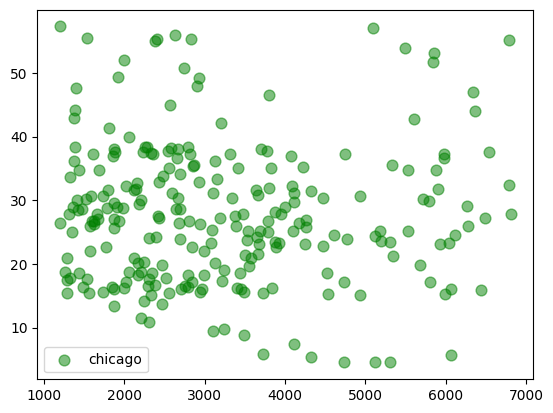

In [9]:
loans['debt_to_income'] = loans['repayment'] * 100 / loans['income']
plt.scatter(loans['income'], loans['debt_to_income'],label='chicago',
    s=60, alpha=0.5, c='green', marker='o')
plt.legend()
# s is size of point
# alpha is transparency between 0 and 1
# c is color
# marker is shape of point

## Pie chart

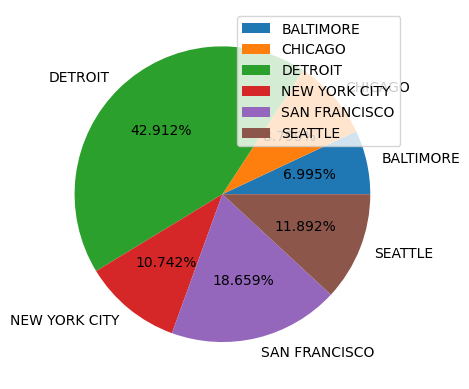

In [11]:
data = loans.groupby('city')['repayment'].sum()
data = data.reset_index()# We need to use the  reset_index  here because we need the  city  variable when creating our next charts.
plt.pie(x=data['repayment'], labels=data['city'], autopct='%.3f%%')
plt.legend(loc='upper right')

# Bar chart

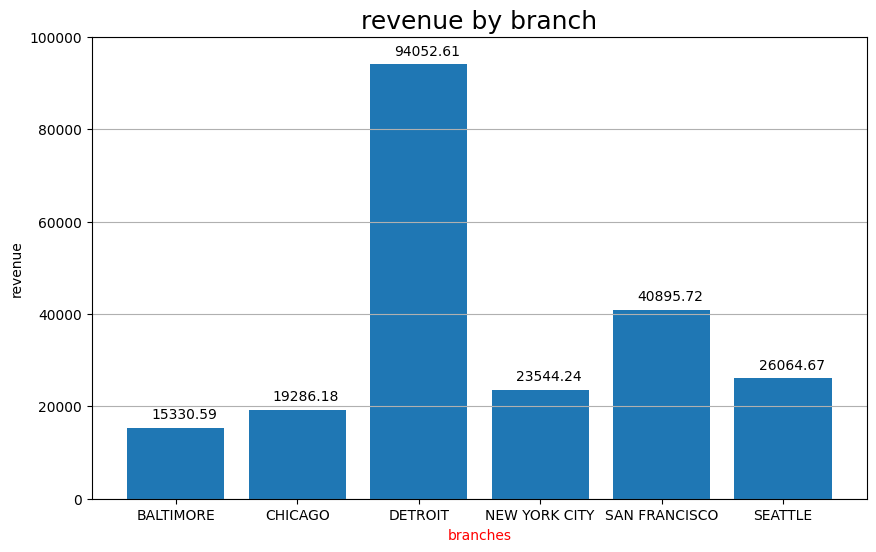

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(height=data['repayment'], x=data['city'])
plt.title('revenue by branch',fontsize=18)
plt.grid(axis='y')
plt.ylim(0,100000)
#plt.yticks([0,100000,300000,600000])
rev = data['repayment'].tolist()
for i in range(6):
    plt.text(i-0.2,rev[i]+2000,round(rev[i],2))
plt.xlabel("branches",color='red')
plt.ylabel("revenue")
plt.show()


## Histogram

C:\Users\DELL\AppData\Local\Temp\ipykernel_3292\3890538766.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


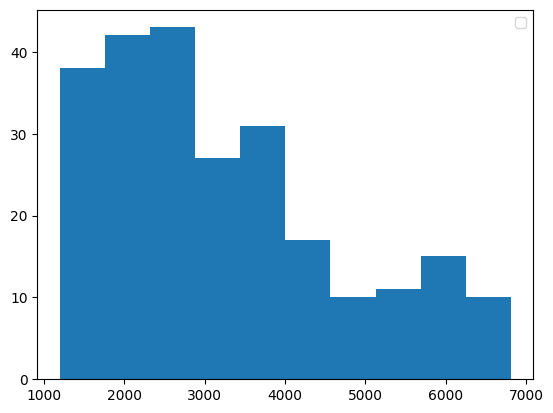

In [ ]:
plt.hist(loans['income'])


## https://nbviewer.org/urls/gist.githubusercontent.com/Jwink3101/e6b57eba3beca4b05ec146d9e38fc839/raw/f486ca3dcad44c33fc4e7ddedc1f83b82c02b492/Matplotlib_Cheatsheet


### SEABORN

<Axes: xlabel='income', ylabel='debt_to_income'>

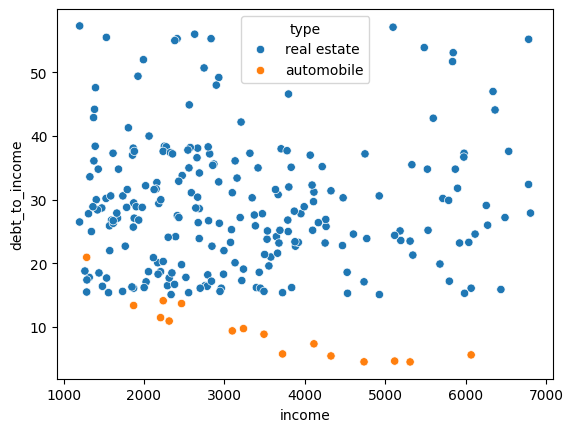

In [15]:
import seaborn as sns
sns.scatterplot(data=loans, x='income', y='debt_to_income',hue='type')

<Axes: xlabel='income', ylabel='debt_to_income'>

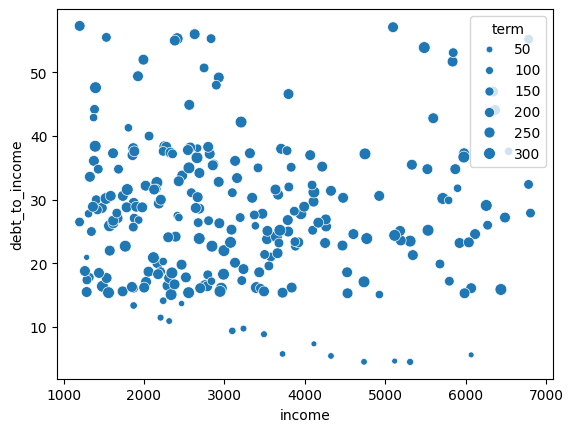

In [16]:
sns.scatterplot(data=loans, x='income', y='debt_to_income',size='term')

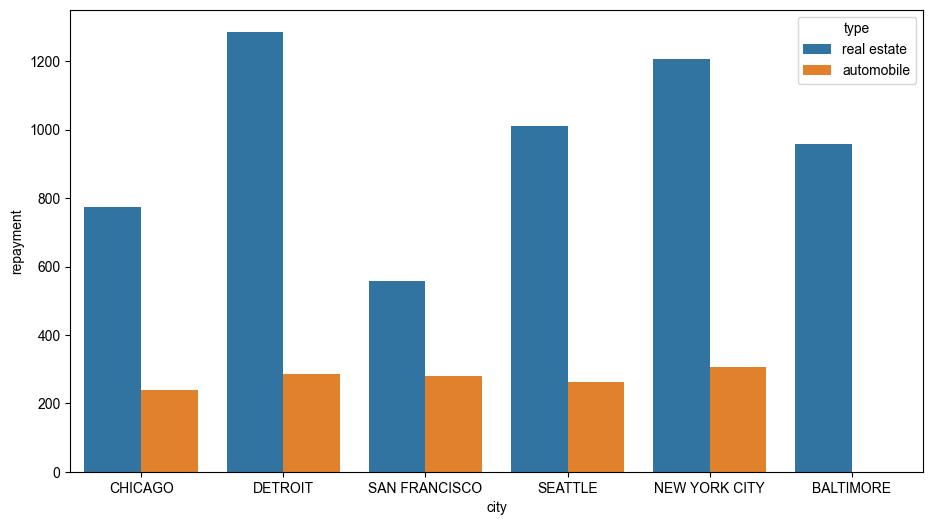

In [17]:
import numpy as np
plt.figure(figsize=(11,6))
sns.barplot(data=loans, x='city', y='repayment', errorbar=None, estimator=np.mean,hue='type')
sns.set_theme(style='whitegrid', palette='pastel')